In [1]:
# flake8: noqa
# pylint: disable-all

r"""°°°
# Lista 4 - ICs e Bootstrap
°°°"""

'°°°\n# Lista 4 - ICs e Bootstrap\n°°°'

## Intervalos de Confiança

In [2]:
r"""°°°
Intervalos de confiança são intervalos calculados a partir de observações que podem variar de amostra para amostra e que com dada frequência (nível de confiança) inclui o parâmetro de interesse real não observável. 

**Por exemplo:** Um intervalo com nível de confiança de 99% para a média de uma variável aleatória significa que ao calcularmos *n* intervalos de confiança tomando como base *n* amostras aleatórias, espera-se que 99% dos intervalos construídos contenham o valor real do parâmetro (média).

Em outras palavras, o nível de confiança seria a proporção de intervalos de confiança construídos em experimentos separados da mesma população e com o mesmo procedimento que contém o parâmetro de interesse real.
°°°"""

'°°°\nIntervalos de confiança são intervalos calculados a partir de observações que podem variar de amostra para amostra e que com dada frequência (nível de confiança) inclui o parâmetro de interesse real não observável. \n\n**Por exemplo:** Um intervalo com nível de confiança de 99% para a média de uma variável aleatória significa que ao calcularmos *n* intervalos de confiança tomando como base *n* amostras aleatórias, espera-se que 99% dos intervalos construídos contenham o valor real do parâmetro (média).\n\nEm outras palavras, o nível de confiança seria a proporção de intervalos de confiança construídos em experimentos separados da mesma população e com o mesmo procedimento que contém o parâmetro de interesse real.\n°°°'

In [3]:
r"""°°°
Foram ministradas duas maneiras de construírmos intervalos de confiança:

- Probabilisticamente direto dos dados (Forma clássica).
- Via sub-amostragem com reposição (*Bootstrap*).
°°°"""

'°°°\nForam ministradas duas maneiras de construírmos intervalos de confiança:\n\n- Probabilisticamente direto dos dados (Forma clássica).\n- Via sub-amostragem com reposição (*Bootstrap*).\n°°°'

In [4]:
r"""°°°
Para o primeiro caso, lembrando do conceito visto em aula, temos (para um IC com 95% de confiança):

$$\begin{align}
0.95 = P(-z \le Z \le z)=P \left(-1.96 \le \frac {\bar X-\mu}{\sigma/\sqrt{n}} \le 1.96 \right) = P \left( \bar X - 1.96 \frac \sigma {\sqrt{n}} \le \mu \le \bar X + 1.96 \frac \sigma {\sqrt{n}}\right).
\end{align}$$
°°°"""

'°°°\nPara o primeiro caso, lembrando do conceito visto em aula, temos (para um IC com 95% de confiança):\n\n$$\\begin{align}\n0.95 = P(-z \\le Z \\le z)=P \\left(-1.96 \\le \\frac {\\bar X-\\mu}{\\sigma/\\sqrt{n}} \\le 1.96 \\right) = P \\left( \\bar X - 1.96 \\frac \\sigma {\\sqrt{n}} \\le \\mu \\le \\bar X + 1.96 \\frac \\sigma {\\sqrt{n}}\\right).\n\\end{align}$$\n°°°'

In [5]:
r"""°°°
Vamos colocar na prática!
°°°"""

'°°°\nVamos colocar na prática!\n°°°'

In [6]:
r"""°°°
## Exemplo Inicial
°°°"""

'°°°\n## Exemplo Inicial\n°°°'

In [7]:
r"""°°°
Vamos começar construindo um intervalo de confiança pra a média de uma distribuição Normal (Gaussiana) com média $\mu = 0$ e variância $\sigma^2 = 1$.
°°°"""

'°°°\nVamos começar construindo um intervalo de confiança pra a média de uma distribuição Normal (Gaussiana) com média $\\mu = 0$ e variância $\\sigma^2 = 1$.\n°°°'

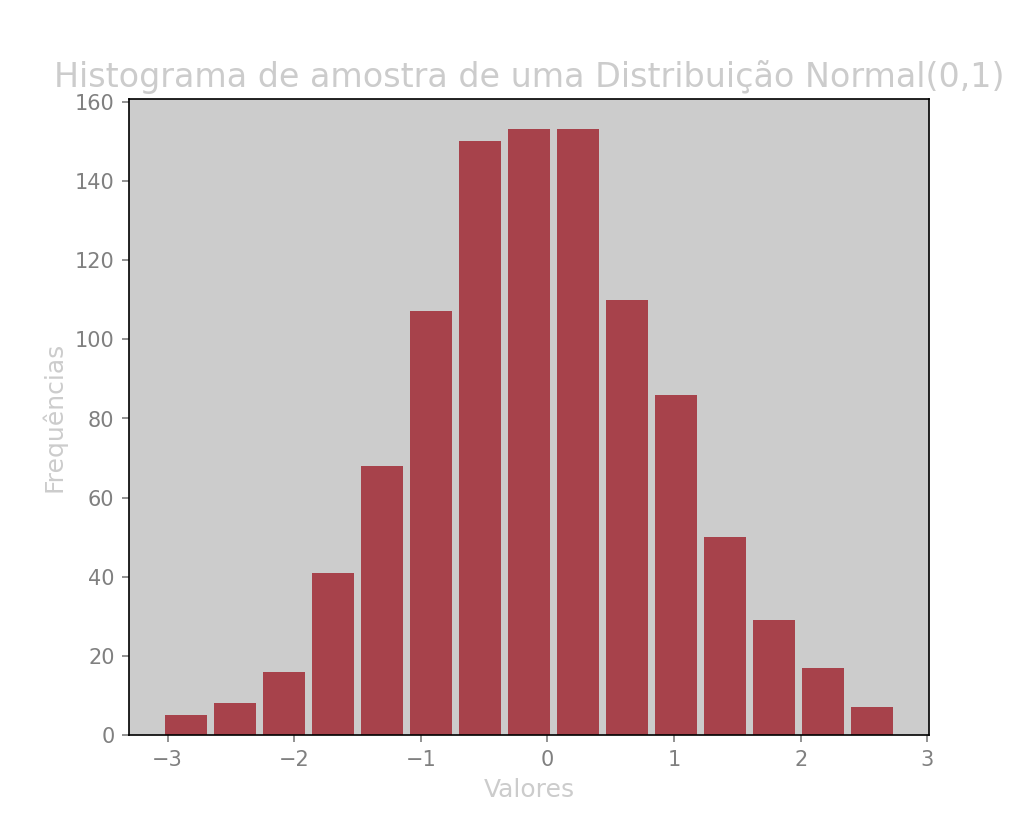


INTERVALO DE CONFIANCA (manual) = [-0.1065, 0.0160]
INTERVALO DE CONFIANCA (com scipy)= [-0.1065, 0.0160]


In [8]:
from math import inf

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

plt.rcParams["figure.figsize"] = (10, 8)

np.random.seed(
    0
)  # comando adicionado para reprodutibilidade dos números aleatórios gerados


def confidence_interval(loc, scale, alpha=0.99):
    """Essa função cria uma distribuição Normal com base nos parâmetros fornecidos e constrói um intervalo de confiança para sua média.

    Parameters:
    -----------
    loc (float): Média da distribuição desejada.
    scale (float): Desvio padrão da distribuição desejada.
    alpha (float): Nível de confiança do intervalo. Deve ser um valor entre 0 e 1. Default = 0.99, o que corresponde a 99% de confiança.

    Returns:
    -----------
    X (array): Dados gerados segundo uma distribuição Normal(0,1).
    LI (float): Limite inferior do intervalo calculado.
    LS (float): Limite superior do intervalo calculado.

    """

    # Gerando amostra de uma Normal(0,1) de tamanho N
    N = 1000
    X = np.random.normal(loc=loc, scale=scale, size=N)

    # Criando plot da amostra gerada
    plt.xlabel("Valores", fontsize=12)
    plt.ylabel("Frequências", fontsize=12)
    plt.title("Histograma de amostra de uma Distribuição Normal(0,1)", fontsize=16)

    plt.hist(X, color="#A3333D", alpha=0.9, rwidth=0.85, bins=15)
    plt.show()

    # Calculando intervalo de  95% de confiança para a média manualmente
    LI = X.mean() - 1.96 * (X.std(ddof=1) / np.sqrt(N))  # LI = limite inferior
    LS = X.mean() + 1.96 * (X.std(ddof=1) / np.sqrt(N))  # LS = limite superior
    print("INTERVALO DE CONFIANCA (manual) = [{:.4f}, {:.4f}]".format(LI, LS))

    # Utilizando o valor da confiança como base, utilizamos o pacote scipy.stats
    LI = X.mean() - ss.norm.ppf(alpha + (1 - alpha) / 2).round(2) * (
        X.std(ddof=1) / np.sqrt(N)
    )
    LS = X.mean() + ss.norm.ppf(alpha + (1 - alpha) / 2).round(2) * (
        X.std(ddof=1) / np.sqrt(N)
    )

    # Printando intervalo de confiança
    print("INTERVALO DE CONFIANCA (com scipy)= [{:.4f}, {:.4f}]".format(LI, LS))

    return X, LI, LS


X, LI, LS = confidence_interval(loc=0, scale=1, alpha=0.95)

In [9]:
r"""°°°
Podemos afirmar que, se pudermos repetir muitas vezes o experimento e coletarmos os dados, aproximadamente em 95% das vezes a média populacional estará no intervalo encontrado.

**Algumas observações interessantes. Note que:**
- A cada vez que executamos o código acima, tanto os intervalos como o histograma dos dados são diferentes. Estamos realizando uma amostra de uma distribuição.
- A medida que o tamanho da amostra (N) cresce, o tamanho do intervalo - para um mesmo nível de confiança - cai. Isso ocorre pois com mais dados temos uma maior certeza de que os valores encontrados de fato representam a população de interesse.
- Os valores dos intervalos de confiança (manual e scipy) só coincidem quando *alpha=0.95*. Essa é a vantagem de se utilizar o pacote. Para valores diferentes de 0.95, deve-se consultar o valor correspondente na distribuição Z.
°°°"""

'°°°\nPodemos afirmar que, se pudermos repetir muitas vezes o experimento e coletarmos os dados, aproximadamente em 95% das vezes a média populacional estará no intervalo encontrado.\n\n**Algumas observações interessantes. Note que:**\n- A cada vez que executamos o código acima, tanto os intervalos como o histograma dos dados são diferentes. Estamos realizando uma amostra de uma distribuição.\n- A medida que o tamanho da amostra (N) cresce, o tamanho do intervalo - para um mesmo nível de confiança - cai. Isso ocorre pois com mais dados temos uma maior certeza de que os valores encontrados de fato representam a população de interesse.\n- Os valores dos intervalos de confiança (manual e scipy) só coincidem quando *alpha=0.95*. Essa é a vantagem de se utilizar o pacote. Para valores diferentes de 0.95, deve-se consultar o valor correspondente na distribuição Z.\n°°°'

In [10]:
r"""°°°
## Dados ENEM 2015.
°°°"""

'°°°\n## Dados ENEM 2015.\n°°°'

In [11]:
r"""°°°
Nos exercícios dessa seção vamos trabalhar com os dados do [ENEM 2015](https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/enem2015.csv).

Importando pandas e carregando dados.
°°°"""

'°°°\nNos exercícios dessa seção vamos trabalhar com os dados do [ENEM 2015](https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/enem2015.csv).\n\nImportando pandas e carregando dados.\n°°°'

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/enem2015.csv"
data = pd.read_csv(url)

In [12]:
r"""°°°
Primeiras visualizações do banco de dados do ENEM 2015.
°°°"""

'°°°\nPrimeiras visualizações do banco de dados do ENEM 2015.\n°°°'

In [13]:
data.head()

  DEPENDENCIA_ADMINISTRATIVA  ...  TAXA_DE_PARTICIPACAO
0                    Federal  ...             96.894409
1                    Federal  ...             98.717949
2                   Estadual  ...             74.603180
3                   Estadual  ...             54.651165
4                   Estadual  ...             64.864861

[5 rows x 4 columns]

In [14]:
data.describe()

       NOTA_MEDIA_ESCOLA  TAXA_DE_APROVACAO  TAXA_DE_PARTICIPACAO
count        1685.000000        1683.000000           1685.000000
mean          575.391745          86.044444             75.263669
std            40.796223          10.334011             16.886193
min           487.007141          47.700000             50.000000
25%           544.937500          79.500000             59.615387
50%           561.520752          87.800000             72.916672
75%           607.530579          94.550000             92.857140
max           713.629028         100.000000            100.000000

In [15]:
r"""°°°
## Exercício 01
°°°"""

'°°°\n## Exercício 01\n°°°'

In [16]:
r"""°°°
Altere a função a baixo para retornar o intervalo de confiança para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas com 'DEPENDENCIA_ADMINISTRATIVA' == Estadual.

Nível de confiança: 99%

**Lembrete**: será necessário aplicar os conhecimentos de pandas do módulo anterior para filtrar o DataFrame selecionando apenas os casos de interesse.
°°°"""

"°°°\nAltere a função a baixo para retornar o intervalo de confiança para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas com 'DEPENDENCIA_ADMINISTRATIVA' == Estadual.\n\nNível de confiança: 99%\n\n**Lembrete**: será necessário aplicar os conhecimentos de pandas do módulo anterior para filtrar o DataFrame selecionando apenas os casos de interesse.\n°°°"

In [ ]:
def CI(df1: pd.DataFrame) -> tuple[np.float64, np.float64]:
    df_estadual: pd.DataFrame = df1[df1["DEPENDENCIA_ADMINISTRATIVA"] == "Estadual"]
    X: pd.Series = df_estadual["NOTA_MEDIA_ESCOLA"]
    N: int = X.size
    alpha: float = 0.99
    LI: np.float64 = X.mean() - ss.norm.ppf(alpha + (1 - alpha) / 2).round(2) * (
        X.std(ddof=1) / np.sqrt(N)
    )
    LS: np.float64 = X.mean() + ss.norm.ppf(alpha + (1 - alpha) / 2).round(2) * (
        X.std(ddof=1) / np.sqrt(N)
    )
    # Retorne uma tupla com os limites inferior e superior do intervalo de confiança, respectivamente
    # return (LI, LS)
    # se ocorrer erro de float, tente dar cast na tupla (LI,LS) assim: (np.array(LI), np.array(LS))
    return LI, LS

In [17]:
r"""°°°
Carregando os módulos de testes!
°°°"""

'°°°\nCarregando os módulos de testes!\n°°°'

In [ ]:
from numpy.testing import assert_equal

In [18]:
r"""°°°
Nosso teste
°°°"""

'°°°\nNosso teste\n°°°'

In [ ]:
(LI, LS) = CI(data)

assert_equal(548.13, LI.round(2))
assert_equal(551.09, LS.round(2))

In [19]:
r"""°°°
## Exercício 02 (Sem correção automática)
°°°"""

'°°°\n## Exercício 02 (Sem correção automática)\n°°°'

In [20]:
r"""°°°
Plote uma CDF da coluna 'TAXA_DE_APROVACAO'.

**Use o statsmodels e crie um objeto `ecdf = ECDF(...)`.**


Esta tarefa não tem correção automática, use o gráfico abaixo para saber se acertou ou não.

![](https://github.com/pedroharaujo/ICD_Docencia/blob/master/ECDF.png?raw=true)
°°°"""

"°°°\nPlote uma CDF da coluna 'TAXA_DE_APROVACAO'.\n\n**Use o statsmodels e crie um objeto `ecdf = ECDF(...)`.**\n\n\nEsta tarefa não tem correção automática, use o gráfico abaixo para saber se acertou ou não.\n\n![](https://github.com/pedroharaujo/ICD_Docencia/blob/master/ECDF.png?raw=true)\n°°°"

In [ ]:
# codigo para importar a função ECDF
from statsmodels.distributions.empirical_distribution import ECDF

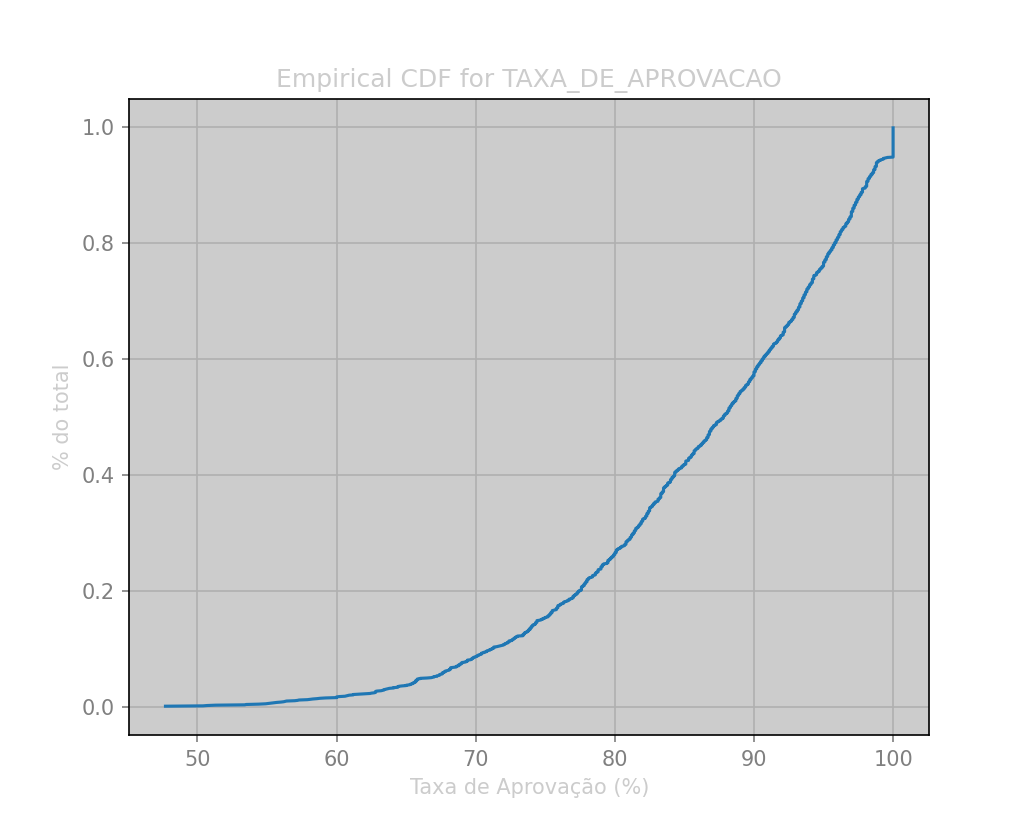

In [21]:
# YOUR CODE HERE
ecdf = ECDF(data["TAXA_DE_APROVACAO"])
plt.plot(ecdf.x, ecdf.y)
plt.title("Empirical CDF for TAXA_DE_APROVACAO")
plt.grid(which="both")
plt.ylabel("% do total")
plt.xlabel("Taxa de Aprovação (%)")
plt.show()

In [22]:
r"""°°°
## Bootstrap
°°°"""

'°°°\n## Bootstrap\n°°°'

In [23]:
r"""°°°
Quando falamos em bootstrap deve-se ter em mente que estamos falando de amostragem com reposição.

De maneira simplista, utilizamos bootstrap quando queremos construir um intervalo de confiança para uma variável e dispomos de poucos dados. Ao realizarmos várias sub-amostras **com reposição**, a lei dos grandes números nos garante que estamos aproximando a população de interesse.

Note o destaque para o termo com reposição. É CRUCIAL que as sub-amostras sejam feitas com reposição. Só assim garantimos a aleatoriedade!

Veja o exemplo abaixo.
°°°"""

'°°°\nQuando falamos em bootstrap deve-se ter em mente que estamos falando de amostragem com reposição.\n\nDe maneira simplista, utilizamos bootstrap quando queremos construir um intervalo de confiança para uma variável e dispomos de poucos dados. Ao realizarmos várias sub-amostras **com reposição**, a lei dos grandes números nos garante que estamos aproximando a população de interesse.\n\nNote o destaque para o termo com reposição. É CRUCIAL que as sub-amostras sejam feitas com reposição. Só assim garantimos a aleatoriedade!\n\nVeja o exemplo abaixo.\n°°°'

In [24]:
col = "TAXA_DE_PARTICIPACAO"
n_sub = 10000  # numero de sub-amostras
size = len(data)  # tamanho do dataframe
values = np.zeros(n_sub)


def bootstrap(n_sub, size, col):
    for i in range(n_sub):
        # replace=TRUE garanta amostras com reposição
        random_state = i  # garante replicabilidade do experimento
        sample = data.sample(size, replace=True, random_state=i)

        # Lembre que podemos utilizar mediana, média ou qualquer outra estatística agregada
        # values[i] = sample[col].median()
        values[i] = sample[col].mean()

    # Gerando valores inferior e superior para um nível de confiança de 95%
    LI = np.percentile(values, 2.5)
    LS = np.percentile(values, 97.5)
    return values, LI, LS


values, LI, LS = bootstrap(n_sub, size, col)
print("Intervalo de Confianca: [{}, {}]".format(LI.round(4), LS.round(4)))

Intervalo de Confianca: [74.4523, 76.0718]


In [25]:
r"""°°°
## Exercício 03
°°°"""

'°°°\n## Exercício 03\n°°°'

In [26]:
r"""°°°
Realizando um groupy pela coluna 'DEPENDENCIA_ADMINISTRATIVA' conseguimos observar para quais casos vale a pena utilizarmos bootstrap.
°°°"""

"°°°\nRealizando um groupy pela coluna 'DEPENDENCIA_ADMINISTRATIVA' conseguimos observar para quais casos vale a pena utilizarmos bootstrap.\n°°°"

In [27]:
data.groupby("DEPENDENCIA_ADMINISTRATIVA").count()

                            NOTA_MEDIA_ESCOLA  ...  TAXA_DE_PARTICIPACAO
DEPENDENCIA_ADMINISTRATIVA                     ...                      
Estadual                                 1054  ...                  1054
Federal                                    43  ...                    43
Municipal                                  22  ...                    22
Privada                                   566  ...                   566

[4 rows x 3 columns]

In [28]:
r"""°°°
**A)** Na função abaixo, retorne o número da opção que indica para quais 'DEPENDENCIAS_ADMINISTRATIVAS' é aconselhado utilizar Bootstrap para construção do intervalo de confiança:

- 1) Estadual e Federal.
- 2) Estadual e Municipal.
- 3) Estadual e Privada.
- 4) Federal e Municipal.
- 5) Federal e Privada.
- 6) Municipal e Privada.
°°°"""

"°°°\n**A)** Na função abaixo, retorne o número da opção que indica para quais 'DEPENDENCIAS_ADMINISTRATIVAS' é aconselhado utilizar Bootstrap para construção do intervalo de confiança:\n\n- 1) Estadual e Federal.\n- 2) Estadual e Municipal.\n- 3) Estadual e Privada.\n- 4) Federal e Municipal.\n- 5) Federal e Privada.\n- 6) Municipal e Privada.\n°°°"

In [ ]:
def resposta() -> int:
    # Pelo groupby, Federal e Municipal são as categorias que possuem menos dados,
    # portanto o bootstrap pode ser mais útil pra elas
    return 4

In [ ]:
assert_equal(4, resposta())

In [29]:
r"""°°°
**B)** Construa um intervalo de confiança via Bootstrap para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas de 'DEPENDENCIA_ADMINISTRATIVA' **Federal**. Você deve utilizar 5000 amostras e nível de confiança de 90%.

*Nota*: você deve utilizar o argumento random_state=i na função data.sample, como no exemplo inicial da seção de Bootstrap.
°°°"""

"°°°\n**B)** Construa um intervalo de confiança via Bootstrap para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas de 'DEPENDENCIA_ADMINISTRATIVA' **Federal**. Você deve utilizar 5000 amostras e nível de confiança de 90%.\n\n*Nota*: você deve utilizar o argumento random_state=i na função data.sample, como no exemplo inicial da seção de Bootstrap.\n°°°"

In [ ]:
def bootstrap_mean(n_sub: int, alpha: float):

    df_federal: pd.DataFrame = data[data["DEPENDENCIA_ADMINISTRATIVA"] == "Federal"]
    col: str = "NOTA_MEDIA_ESCOLA"
    df_size: int = len(df_federal)
    values: np.ndarray = np.zeros(n_sub)

    for i in range(n_sub):
        sample: pd.DataFrame = df_federal.sample(df_size, replace=True, random_state=i)
        values[i] = sample[col].mean()

    # Gerando valores inferior e superior para um nível de confiança de `alpha`
    LI: np.float64 = np.percentile(values, (100 - alpha * 100) / 2)
    LS: np.float64 = np.percentile(values, 100 - (100 - alpha * 100) / 2)
    # se ocorrer erro de float, tente dar cast na tupla (LI,LS) assim: (np.array(LI), np.array(LS))
    return values, (LI, LS)

In [ ]:
values, (LI, LS) = bootstrap_mean(n_sub=5000, alpha=0.9)

assert_equal(622.03, LI.round(2))
assert_equal(635.43, LS.round(2))

In [30]:
r"""°°°
## Exercício 4
°°°"""

'°°°\n## Exercício 4\n°°°'

In [31]:
r"""°°°
Altere a função abaixo para que retorne a 'DEPENDENCIA_ADMINISTRATIVA' (Federal, Estadual, Municipal ou Privada) cujo intervalo de confiança para *mediana* via *bootstrap* para a variável 'TAXA_DE_PARTICIPACAO' apresente maior amplitude (LS-LI), e qual esse valor. 

Utilize:
- 95% como nível de confiança.
- 5000 como número de sub-amostras.
°°°"""

"°°°\nAltere a função abaixo para que retorne a 'DEPENDENCIA_ADMINISTRATIVA' (Federal, Estadual, Municipal ou Privada) cujo intervalo de confiança para *mediana* via *bootstrap* para a variável 'TAXA_DE_PARTICIPACAO' apresente maior amplitude (LS-LI), e qual esse valor. \n\nUtilize:\n- 95% como nível de confiança.\n- 5000 como número de sub-amostras.\n°°°"

In [ ]:
def ci_amplitude():
    col: str = "TAXA_DE_PARTICIPACAO"
    n_sub: int = 5000

    max_amp: np.float64 = np.float64(-inf)
    dependencia_adm = "Federal"
    adm_opts: list[str] = ["Federal", "Estadual", "Municipal", "Privada"]

    for j, opt in enumerate(adm_opts):
        df_opt: pd.DataFrame = data[data["DEPENDENCIA_ADMINISTRATIVA"] == opt]
        df_size: int = len(df_opt)

        values: np.ndarray = np.zeros(n_sub)
        for i in range(n_sub):
            sample: pd.DataFrame = df_opt.sample(df_size, replace=True, random_state=i)
            values[i] = sample[col].median()

        # Gerando valores inferior e superior para um nível de confiança de `alpha`
        LI: np.float64 = np.percentile(values, 2.5)
        LS: np.float64 = np.percentile(values, 97.5)
        amp: np.float64 = LS - LI
        if amp > max_amp:
            max_amp = amp
            dependencia_adm = adm_opts[j]
    # Sua função deve retorar uma tupla como no exemplo
    # exemplo: (dependencia_administrativa, amplitude_do_ic)
    return (dependencia_adm, max_amp)

In [ ]:
(dep, amp) = ci_amplitude()
assert_equal(dep, "Municipal")
assert_equal(amp.round(2), 11.09)